# Life Expectancy & GDP

### *In the Chile, China, Germany, Mexico, United States, and Zimbabwe*

*In this project, my goal will be to examine the correlation between life expectancy and gdp growth by using visualizations and summary statistics*

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


*Inspect how many countries are in the data set*

In [5]:
nations = data.Country.unique()
countries = []
for nation in nations:
    # replace w USA for visuals
    country = nation.replace('United States of America', 'USA')
    countries.append(country)
print(countries)

['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']


In [62]:
# divide gdp data into bins

# label the bins
binLabels = ['1','2', '3','4']

# bin the data
data['GDPbins'] = pd.cut(data['GDP'], 4, labels=binLabels)

*Line graphs of GDP and life expectancy by year for each country:*

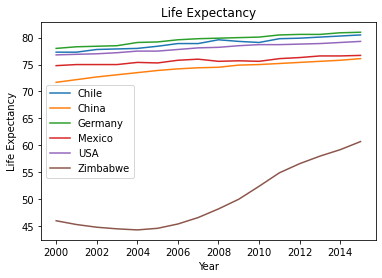

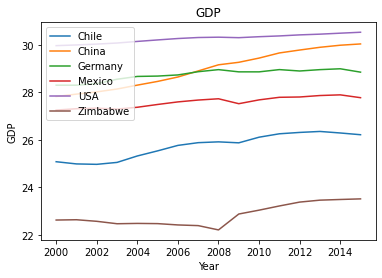

<Figure size 432x288 with 0 Axes>

In [64]:
years = data['Year'][data.Country == 'Chile']

ax = plt.subplot()
for x in range(len(countries)):
    life = data['Life expectancy at birth (years)'][data.Country == nations[x]]
    plt.plot(years, life)
    
plt.title('Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(countries)
plt.show()

plt.clf()

for x in range(len(countries)):
    gdp = np.log(data['GDP'][data.Country == nations[x]])
    plt.plot(years, gdp)

plt.title('GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(countries, loc=2)
plt.show()
plt.clf()



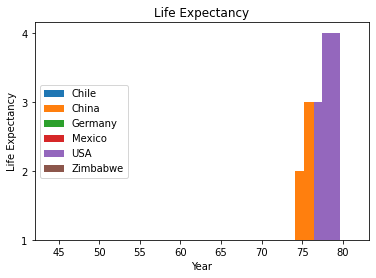

<Figure size 432x288 with 0 Axes>

In [78]:
ax = plt.subplot()
for x in range(len(countries)):
    life = data['Life expectancy at birth (years)'][data.Country == nations[x]]
    gdp = data['GDPbins'][data.Country == nations[x]]
    plt.bar(life, gdp)
    
plt.title('Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(countries, loc = 6)
plt.show()

plt.clf()

Chile average life span: 78.94375
China average life span: 74.26249999999999
Germany average life span: 79.65625
Mexico average life span: 75.71875
USA average life span: 78.0625
Zimbabwe average life span: 50.09375


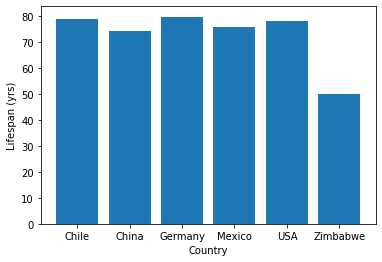

<Figure size 432x288 with 0 Axes>

In [13]:
# average life span of each country
lifespans = []
for x in range(len(nations)):
    averageLife = data['Life expectancy at birth (years)'][data.Country == nations[x]].mean()
    lifespans.append(averageLife)
    print(countries[x] + ' average life span: ' + str(averageLife))
plt.bar(countries, lifespans)
plt.xlabel('Country')
plt.ylabel('Lifespan (yrs)')
plt.show()
plt.clf()

In [125]:
# GDP and Life Expectancy Growth Rates
# initialize lists for which will hold bar chart values
lifeGrowthList = []
gdpGrowthList = []
for x in range(len(nations)):
    # life expectancy first year
    initialLife = data['Life expectancy at birth (years)'][(data.Country == nations[x])].iloc[0]
    # life expectancy last year
    finalLife = data['Life expectancy at birth (years)'][(data.Country == nations[x])].iloc[len(years)-1]
    # life exp growth calculations
    lifeGrowth = ((finalLife - initialLife) / (finalLife)) * 100
    # GDP first year
    initialGdp = data['GDP'][(data.Country == nations[x])].iloc[0]
    # GDP last year
    finalGdp = data['GDP'][(data.Country == nations[x])].iloc[len(years)-1]
    # GDP growth calculations
    gdpGrowth = ((finalGdp - initialGdp) / initialGdp) * 100
    # append results to list
    lifeGrowthList.append(lifeGrowth)
    gdpGrowthList.append(gdpGrowth)
    # print results
    results = "'s Life Expectancy Growth Rate from 2000 to 2015 was {:.2f}% \nand it's GDP growth was {:.2f}%".format(lifeGrowth, gdpGrowth)
    print(countries[x] + results)
    print('---------------------------------------------------------------')
    

Chile's Life Expectancy Growth Rate from 2000 to 2015 was 3.98% 
and it's GDP growth was 211.48%
---------------------------------------------------------------
China's Life Expectancy Growth Rate from 2000 to 2015 was 5.78% 
and it's GDP growth was 813.42%
---------------------------------------------------------------
Germany's Life Expectancy Growth Rate from 2000 to 2015 was 3.70% 
and it's GDP growth was 73.11%
---------------------------------------------------------------
Mexico's Life Expectancy Growth Rate from 2000 to 2015 was 2.48% 
and it's GDP growth was 68.55%
---------------------------------------------------------------
USA's Life Expectancy Growth Rate from 2000 to 2015 was 3.15% 
and it's GDP growth was 75.73%
---------------------------------------------------------------
Zimbabwe's Life Expectancy Growth Rate from 2000 to 2015 was 24.22% 
and it's GDP growth was 143.72%
---------------------------------------------------------------


In [121]:
# Overall GDP & Life Expectancy Mean
gdpMean = data['GDP'].mean()
adjGdp = gdpMean/1000000000000
lifeMean = data['Life expectancy at birth (years)'].mean()
print('The overall GDP mean is {:.2f}T dollars.'.format(adjGdp))
print('The overall life expectancy mean is {:.2f} years.'.format(lifeMean))

The overall GDP mean is 3.88T dollars.
The overall life expectancy mean is 72.79 years.


In [127]:
# Standard Deviation
gdpStd = np.std(data['GDP'])
gdpStdAdj = gdpStd/1000000000000
lifeStd = np.std(data['Life expectancy at birth (years)'])
print('The standard deviation for GDP was {:.2f}T dollars.'.format(gdpStdAdj))
print('The standard deviation for life expectancy was {:.2f} years.'.format(lifeStd))

The standard deviation for GDP was 5.17T dollars.
The standard deviation for life expectancy was 10.62 years.


In [19]:
# Covariance & Pearson Correlation
covariance = np.cov(data['GDP'], data['Life expectancy at birth (years)'])
print(str(covariance))
correlation, p = pearsonr(data['GDP'], data['Life expectancy at birth (years)'])
print(correlation)

[[2.70146436e+25 1.90386943e+13]
 [1.90386943e+13 1.13910417e+02]]
0.343206748449156


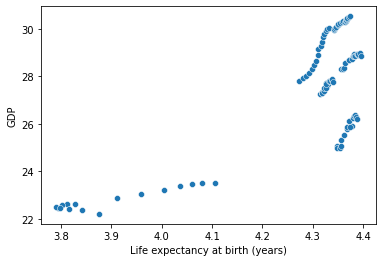

<Figure size 432x288 with 0 Axes>

In [73]:
# Rank Countries by GDP and Life Expectancy Growth

# Bar charts
sns.scatterplot(x = np.log(data['Life expectancy at birth (years)']), y = np.log(data['GDP']))
plt.show()
plt.clf()

In [131]:
# Rank countries by average gdp and life expectancy

In [ ]:
# Conclusion